MCS - 7103                  OKELLO ANDREW PETERS
ASSIGNMENT ONE                2024/HD05/21944U
                                2400721944


**Life Expectancy is becoming a major concern today with a rise of food insecurity and other factors. I am using a dataset called Life Expectancy to help me understand the nexus between life expectancy and a number of control factors.**

In [1]:
#importing pandas library
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/OkelloAndrewPeters/datascience/main/LifeExpectancyData.csv')
df

Country  Year      Status  Life expectancy   Adult Mortality  \
0     Afghanistan  2015  Developing              65.0            263.0   
1     Afghanistan  2014  Developing              59.9            271.0   
2     Afghanistan  2013  Developing              59.9            268.0   
3     Afghanistan  2012  Developing              59.5            272.0   
4     Afghanistan  2011  Developing              59.2            275.0   
...           ...   ...         ...               ...              ...   
2933     Zimbabwe  2004  Developing              44.3            723.0   
2934     Zimbabwe  2003  Developing              44.5            715.0   
2935     Zimbabwe  2002  Developing              44.8             73.0   
2936     Zimbabwe  2001  Developing              45.3            686.0   
2937     Zimbabwe  2000  Developing              46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0                62     0.01               71.279624         65.0      1154   
1                64     0.01               73.523582         62.0       492   
2                66     0.01               73.219243         64.0       430   
3                69     0.01               78.184215         67.0      2787   
4                71     0.01                7.097109         68.0      3013   
...             ...      ...                     ...          ...       ...   
2933             27     4.36                0.000000         68.0        31   
2934             26     4.06                0.000000          7.0       998   
2935             25     4.43                0.000000         73.0       304   
2936             25     1.72                0.000000         76.0       529   
2937             24     1.68                0.000000         79.0      1483   

      ...  Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  \
0     ...    6.0               8.16         65.0        0.1  584.259210   
1     ...   58.0               8.18         62.0        0.1  612.696514   
2     ...   62.0               8.13         64.0        0.1  631.744976   
3     ...   67.0               8.52         67.0        0.1  669.959000   
4     ...   68.0               7.87         68.0        0.1   63.537231   
...   ...    ...                ...          ...        ...         ...   
2933  ...   67.0               7.13         65.0       33.6  454.366654   
2934  ...    7.0               6.52         68.0       36.7  453.351155   
2935  ...   73.0               6.53         71.0       39.8   57.348340   
2936  ...   76.0               6.16         75.0       42.1  548.587312   
2937  ...   78.0               7.10         78.0       43.5  547.358878   

      Population   thinness  1-19 years   thinness 5-9 years  \
0     33736494.0                   17.2                 17.3   
1       327582.0                   17.5                 17.5   
2     31731688.0                   17.7                 17.7   
3      3696958.0                   17.9                 18.0   
4      2978599.0                   18.2                 18.2   
...          ...                    ...                  ...   
2933  12777511.0                    9.4                  9.4   
2934  12633897.0                    9.8                  9.9   
2935    125525.0                    1.2                  1.3   
2936  12366165.0                    1.6                  1.7   
2937  12222251.0                   11.0                 11.2   

      Income composition of resources  Schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                               ...        ...  
2933                            0.407        9.2  
2934                            0.418        9.5  
2935                            0.427      

In [3]:
#having a look at all the columns
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [4]:
df.shape

(2938, 22)

**Cleaning column names. Removing white spaces and renaming some**

In [5]:
df.columns = df.columns.str.strip()

df.rename (columns = {'Life expectancy':'Life Expectancy','percentage expenditure':'Percentage Expenditure',
                      'thinness 1-19 years':'Thinness(1-19 years)','thinness 5-9 years':'Thinness(5-9 years)'}, inplace = True)

df.columns

Index(['Country', 'Year', 'Status', 'Life Expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'Percentage Expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'Thinness(5-9 years)', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [6]:
df.rename (columns = {'thinness  1-19 years': 'Thinness(1-19 years)'}, inplace = True)

In [7]:
df.columns

Index(['Country', 'Year', 'Status', 'Life Expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'Percentage Expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness(1-19 years)',
       'Thinness(5-9 years)', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [8]:
#encoding categorical data
df['Country'] = df['Country'].astype('category')
df['Country'] = df['Country'].cat.codes

df['Year'] = df['Year'].astype('category')
df['Year'] = df['Year'].cat.codes

df['Status'] = df['Status'].astype('category')
df['Status'] = df['Status'].cat.codes

**Selecting features through correlation analysis using a heatmap. I'm dropping columns with a correlation less than 0.5 with respect to my target variable which is Life Expectancy**

<Axes: >

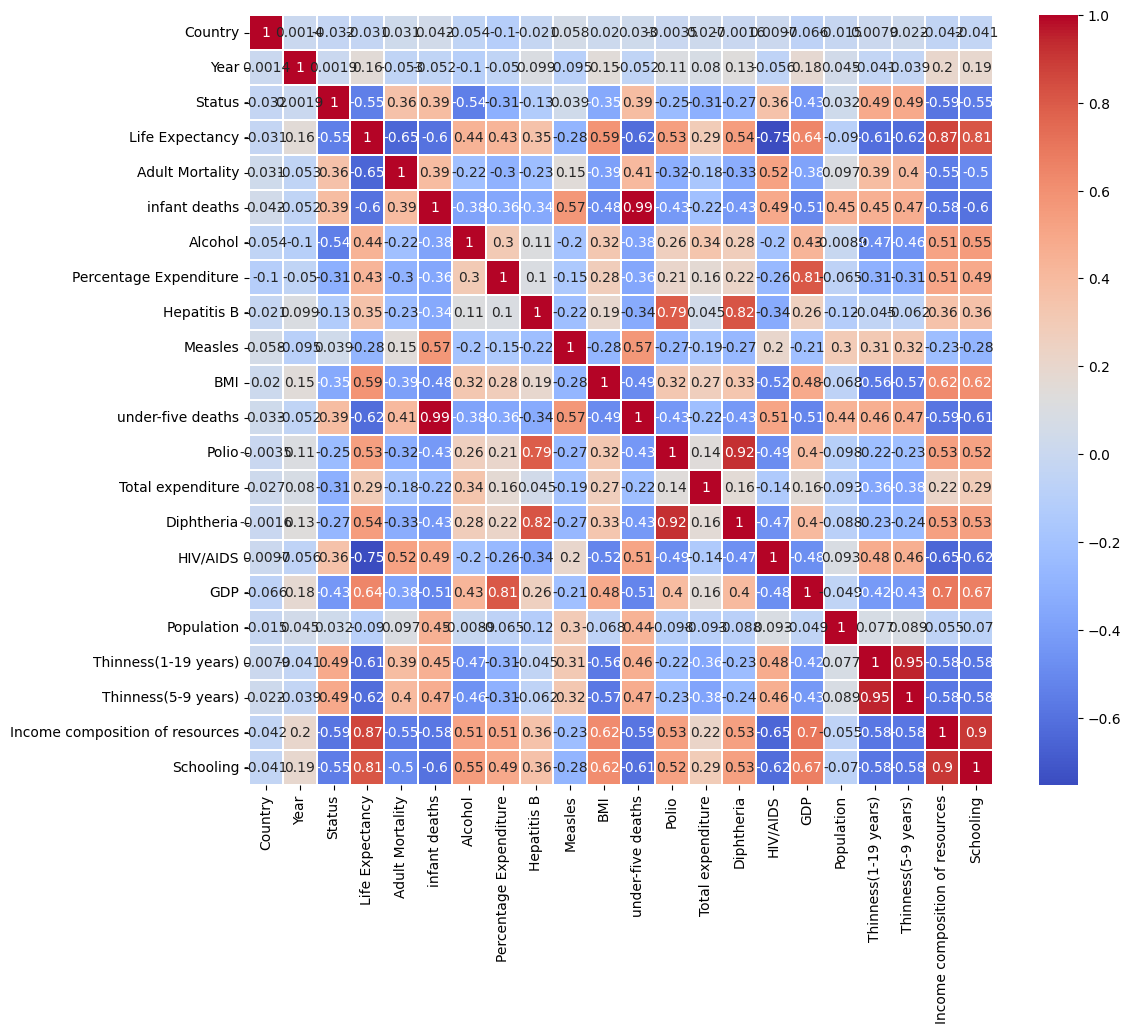

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
corrmat = df.corr(method = "spearman")
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corrmat, ax=ax, cmap = "coolwarm", linewidth = 0.1, annot = True)

In [10]:
#according to the correlation analysis above, I am dropping columns which are < 0.5
df = df.drop(columns = ['Country', 'Year', 'Alcohol', 'Percentage Expenditure',
                        'Hepatitis B', 'Measles', 'Total expenditure', 'Population'], axis=1)

In [11]:
df.head()

Status  Life Expectancy  Adult Mortality  infant deaths   BMI  \
0       1             65.0            263.0             62  19.1   
1       1             59.9            271.0             64  18.6   
2       1             59.9            268.0             66  18.1   
3       1             59.5            272.0             69  17.6   
4       1             59.2            275.0             71  17.2   

   under-five deaths  Polio  Diphtheria  HIV/AIDS         GDP  \
0                 83    6.0        65.0       0.1  584.259210   
1                 86   58.0        62.0       0.1  612.696514   
2                 89   62.0        64.0       0.1  631.744976   
3                 93   67.0        67.0       0.1  669.959000   
4                 97   68.0        68.0       0.1   63.537231   

   Thinness(1-19 years)  Thinness(5-9 years)  Income composition of resources  \
0                  17.2                 17.3                            0.479   
1                  17.5                 17.5                            0.476   
2                  17.7                 17.7                            0.470   
3                  17.9                 18.0                            0.463   
4                  18.2                 18.2                            0.454   

   Schooling  
0       10.1  
1       10.0  
2        9.9  
3        9.8  
4        9.5

In [13]:
#checking for duplicates
df.duplicated().sum()

0

In [14]:
#checking for null values
print(df.isnull().sum())

Status                               0
Life Expectancy                     10
Adult Mortality                     10
infant deaths                        0
BMI                                 34
under-five deaths                    0
Polio                               19
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Thinness(1-19 years)                34
Thinness(5-9 years)                 34
Income composition of resources    167
Schooling                          163
dtype: int64


In [15]:
#dropping null values in for columns with few null value
df.dropna(subset = ['Life Expectancy'], inplace=True)

In [16]:
df.dropna(subset = ['Adult Mortality', 'BMI','Polio', 'Diphtheria'], inplace=True)

In [17]:
print(df.isnull().sum())

Status                               0
Life Expectancy                      0
Adult Mortality                      0
infant deaths                        0
BMI                                  0
under-five deaths                    0
Polio                                0
Diphtheria                           0
HIV/AIDS                             0
GDP                                435
Thinness(1-19 years)                 0
Thinness(5-9 years)                  0
Income composition of resources    160
Schooling                          160
dtype: int64


In [18]:
#using descriptive statistics to summarize the data and also ascertain what to replace the null values with
df.describe().T

count         mean           std       min  \
Status                           2888.0     0.822715      0.381976   0.00000   
Life Expectancy                  2888.0    69.349377      9.495441  36.30000   
Adult Mortality                  2888.0   163.357341    124.018934   1.00000   
infant deaths                    2888.0    30.314751    118.891670   0.00000   
BMI                              2888.0    38.221087     19.962630   1.00000   
under-five deaths                2888.0    41.985803    161.743345   0.00000   
Polio                            2888.0    82.672091     23.333655   3.00000   
Diphtheria                       2888.0    82.437673     23.648907   2.00000   
HIV/AIDS                         2888.0     1.749792      5.116551   0.10000   
GDP                              2453.0  7576.831245  14356.369723   1.68135   
Thinness(1-19 years)             2888.0     4.850589      4.421403   0.10000   
Thinness(5-9 years)              2888.0     4.881337      4.510414   0.10000   
Income composition of resources  2728.0     0.632543      0.206210   0.00000   
Schooling                        2728.0    12.116312      3.197199   0.00000   

                                       25%          50%         75%  \
Status                             1.00000     1.000000     1.00000   
Life Expectancy                   63.47500    72.200000    75.80000   
Adult Mortality                   73.00000   143.000000   225.00000   
infant deaths                      0.00000     3.000000    21.00000   
BMI                               19.30000    43.250000    56.10000   
under-five deaths                  0.00000     4.000000    26.00000   
Polio                             78.00000    93.000000    97.00000   
Diphtheria                        78.00000    93.000000    97.00000   
HIV/AIDS                           0.10000     0.100000     0.80000   
GDP                              464.18465  1812.288374  6256.55926   
Thinness(1-19 years)               1.60000     3.350000     7.20000   
Thinness(5-9 years)                1.50000     3.400000     7.20000   
Income composition of resources    0.50000     0.679500     0.78100   
Schooling                         10.20000    12.400000    14.30000   

                                         max  
Status                                1.0000  
Life Expectancy                      89.0000  
Adult Mortality                     723.0000  
infant deaths                      1800.0000  
BMI                                  77.6000  
under-five deaths                  2500.0000  
Polio                                99.0000  
Diphtheria                           99.0000  
HIV/AIDS                             50.6000  
GDP                              119172.7418  
Thinness(1-19 years)                 27.7000  
Thinness(5-9 years)                  28.6000  
Income composition of resources       0.9480  
Schooling                            20.7000

**For the columns below, since the null values were many, I filled them with the mean**

In [19]:
#I am filling null values with either the mean or median based the difference between the 2
df["GDP"] = df["GDP"].fillna(df["GDP"].median())
df["Thinness(1-19 years)"] = df["Thinness(1-19 years)"].fillna(df["Thinness(1-19 years)"].mean())
df["Thinness(5-9 years)"] = df["Thinness(5-9 years)"].fillna(df["Thinness(5-9 years)"].mean())
df["Income composition of resources"] = df["Income composition of resources"].fillna(df["Income composition of resources"].mean())
df["Schooling"] = df["Schooling"].fillna(df["Schooling"].mean())


In [20]:
#checking again for null values
print(df.isnull().sum())

Status                             0
Life Expectancy                    0
Adult Mortality                    0
infant deaths                      0
BMI                                0
under-five deaths                  0
Polio                              0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Thinness(1-19 years)               0
Thinness(5-9 years)                0
Income composition of resources    0
Schooling                          0
dtype: int64


**Checking for outliers in each column. I am going to handle 1 columns at a time. I am using a box plot. starting with thinness  1-19 years'**

In [21]:
df.shape

(2888, 14)

**box_plot function for viewing outliers**

In [22]:
#defining a function
def plot_boxplot(df, ft):
  df.boxplot(column = [ft])
  plt.grid(False)
  plt.show()

<Axes: ylabel='GDP'>

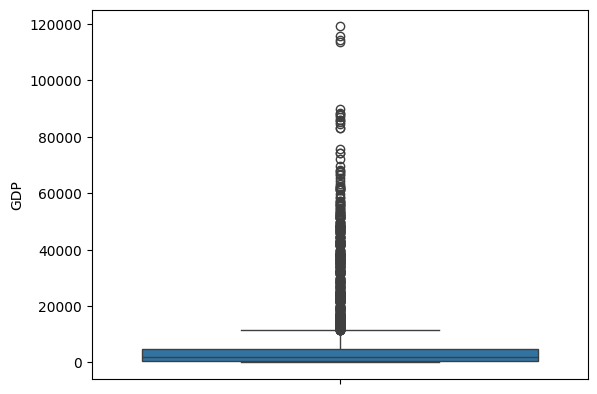

In [23]:
sns.boxplot(df['GDP'])

In [24]:
df['GDP'].shape

(2888,)

In [25]:
#find the limits
upper_limit = df['GDP'].mean() + 3*df['GDP'].std()
lower_limit = df['GDP'].mean() - 3*df['GDP'].std()

print('upper limit', upper_limit)
print('lower limit', lower_limit)

upper limit 46879.79070305616
lower limit -33462.67679333732


In [26]:
#finding the outliers
df.loc[(df['GDP'] > upper_limit) | (df['GDP'] < lower_limit)]

Status  Life Expectancy  Adult Mortality  infant deaths   BMI  \
112        0             82.8             59.0              1  66.6   
113        0             82.7              6.0              1  66.1   
114        0             82.5             61.0              1  65.5   
115        0             82.3             61.0              1  65.0   
116        0             82.0             63.0              1  64.4   
...      ...              ...              ...            ...   ...   
2528       0             82.0              6.0              0  54.6   
2529       0             81.7             63.0              0  54.1   
2530       0             81.5             65.0              0  53.7   
2531       0             81.1             66.0              0  53.2   
2532       0             81.0             69.0              0  52.8   

      under-five deaths  Polio  Diphtheria  HIV/AIDS          GDP  \
112                   1   93.0        93.0       0.1  56554.38760   
113                   1   92.0        92.0       0.1  62214.69120   
114                   1   91.0        91.0       0.1  67792.33860   
115                   1   92.0        92.0       0.1  67677.63477   
116                   1   92.0        92.0       0.1  62245.12900   
...                 ...    ...         ...       ...          ...   
2528                  0   96.0        95.0       0.1  72119.56870   
2529                  0   94.0        94.0       0.1  63223.46778   
2530                  0   94.0        94.0       0.1  57348.92788   
2531                  0   94.0        94.0       0.1  54797.54663   
2532                  0   95.0        93.0       0.1  53255.97631   

      Thinness(1-19 years)  Thinness(5-9 years)  \
112                    0.6                  0.6   
113                    0.6                  0.6   
114                    0.6                  0.6   
115                    0.6                  0.6   
116                    0.6                  0.6   
...                    ...                  ...   
2528                   0.5                  0.4   
2529                   0.5                  0.4   
2530                   0.6                  0.4   
2531                   0.6                  0.4   
2532                   0.6                  0.4   

      Income composition of resources  Schooling  
112                             0.937       20.4  
113                             0.936       20.4  
114                             0.933       20.3  
115                             0.930       20.1  
116                             0.927       19.8  
...                               ...        ...  
2528                            0.914       15.3  
2529                            0.911       15.3  
2530                            0.904       15.2  
2531                            0.899       15.2  
2532                            0.895       15.1  

[91 rows x 14 columns]

In [27]:
#trimming (deleting the otlier data)

new_df = df.loc[(df['GDP'] < upper_limit) & (df['GDP'] > lower_limit)]
new_df.shape

(2797, 14)

<Axes: ylabel='GDP'>

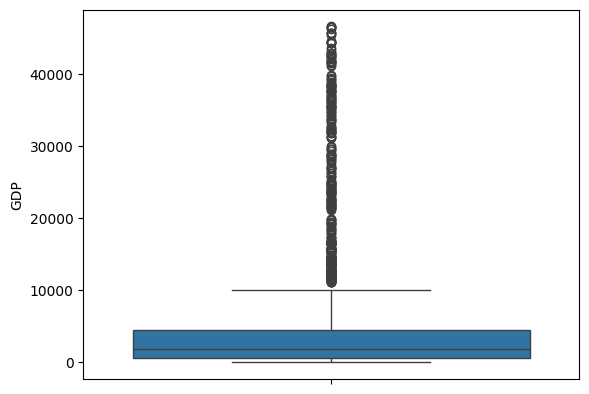

In [28]:
sns.boxplot(new_df['GDP'])

<Axes: >

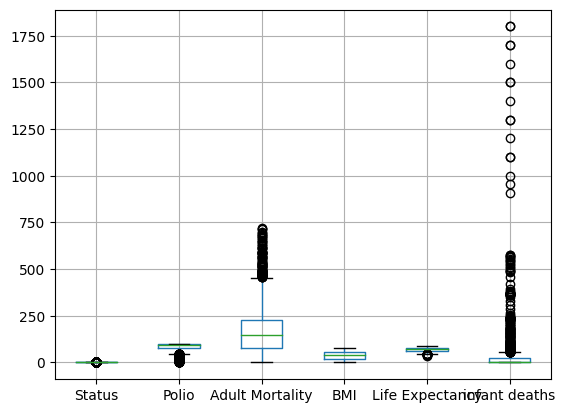

In [29]:
import seaborn as sns
new_df.boxplot(column = ['Status', 'Polio', 'Adult Mortality', 'BMI', 'Life Expectancy', 'infant deaths'])

<Axes: >

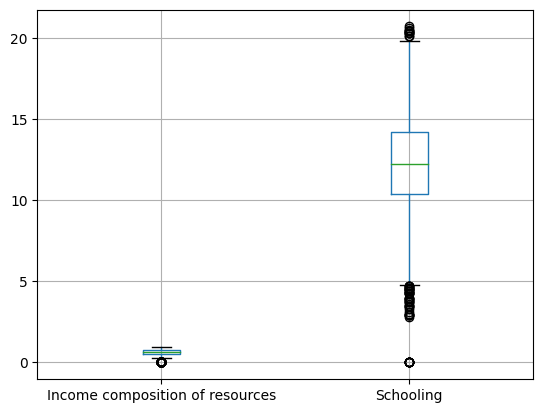

In [30]:
df.boxplot(column = ['Income composition of resources', 'Schooling'])

<Axes: >

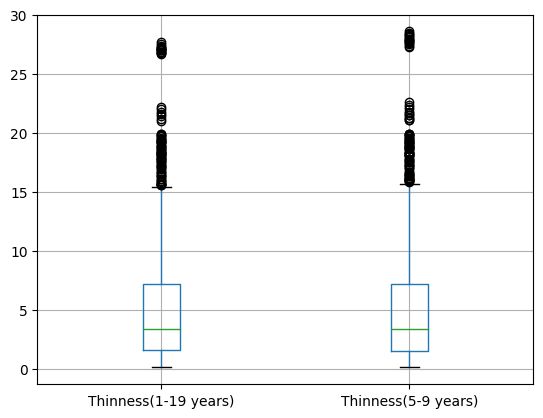

In [31]:
df.boxplot(column = ['Thinness(1-19 years)', 'Thinness(5-9 years)',])

**It is only the GDP column that had out outliers, the rest of the values in the other columns are within the range of the min and max values of that particular feature**

**EXPLORATORY DATA ANALYSIS**

In [32]:
df = new_df.copy()

In [33]:
df.head()

Status  Life Expectancy  Adult Mortality  infant deaths   BMI  \
0       1             65.0            263.0             62  19.1   
1       1             59.9            271.0             64  18.6   
2       1             59.9            268.0             66  18.1   
3       1             59.5            272.0             69  17.6   
4       1             59.2            275.0             71  17.2   

   under-five deaths  Polio  Diphtheria  HIV/AIDS         GDP  \
0                 83    6.0        65.0       0.1  584.259210   
1                 86   58.0        62.0       0.1  612.696514   
2                 89   62.0        64.0       0.1  631.744976   
3                 93   67.0        67.0       0.1  669.959000   
4                 97   68.0        68.0       0.1   63.537231   

   Thinness(1-19 years)  Thinness(5-9 years)  Income composition of resources  \
0                  17.2                 17.3                            0.479   
1                  17.5                 17.5                            0.476   
2                  17.7                 17.7                            0.470   
3                  17.9                 18.0                            0.463   
4                  18.2                 18.2                            0.454   

   Schooling  
0       10.1  
1       10.0  
2        9.9  
3        9.8  
4        9.5

In [34]:
df.shape

(2797, 14)

**UNIVARIATE ANALYSIS**

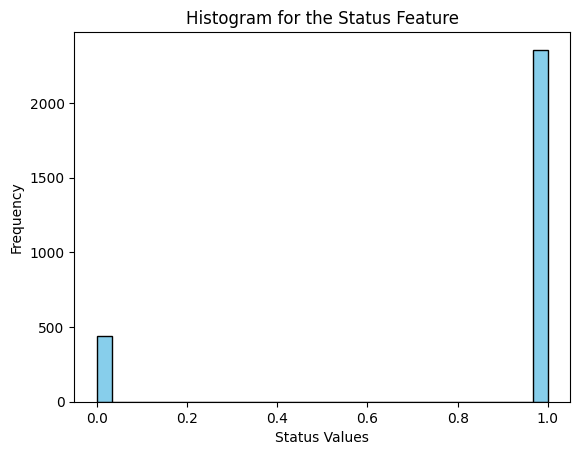

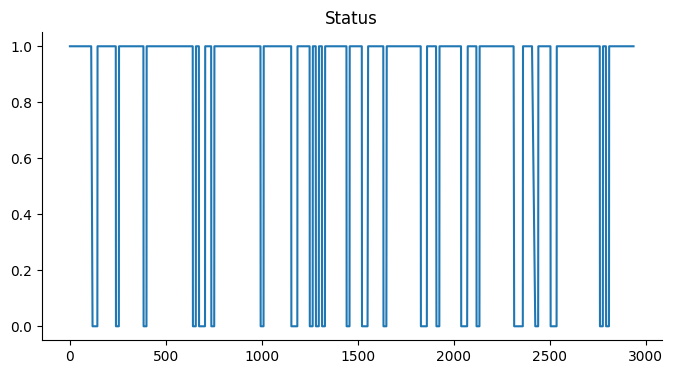

In [35]:
#Starting with status column
plt.hist(df['Status'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Status Values')
plt.ylabel('Frequency')
plt.title('Histogram for the Status Feature')
plt.show()

# @title Status Column

from matplotlib import pyplot as plt
df['Status'].plot(kind='line', figsize=(8, 4), title='Status')
plt.gca().spines[['top', 'right']].set_visible(False)

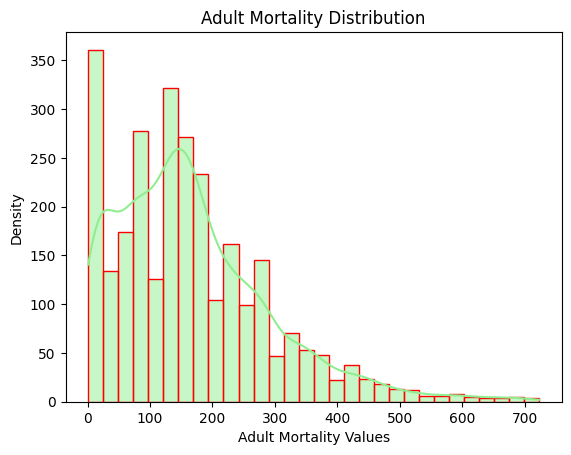

<Axes: ylabel='Adult Mortality'>

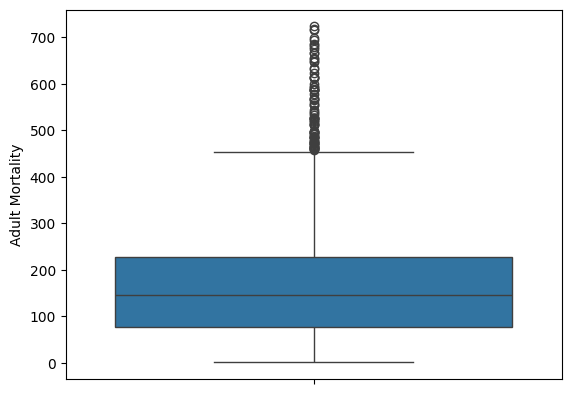

In [36]:
# @title Adult Mortality Column
#Adult Mortality
sns.histplot(df['Adult Mortality'], bins=30, kde=True, color='lightgreen', edgecolor='red')
# Adding labels and title
plt.xlabel('Adult Mortality Values')
plt.ylabel('Density')
plt.title('Adult Mortality Distribution')

# Display the plot
plt.show()

sns.boxplot(df['Adult Mortality'])

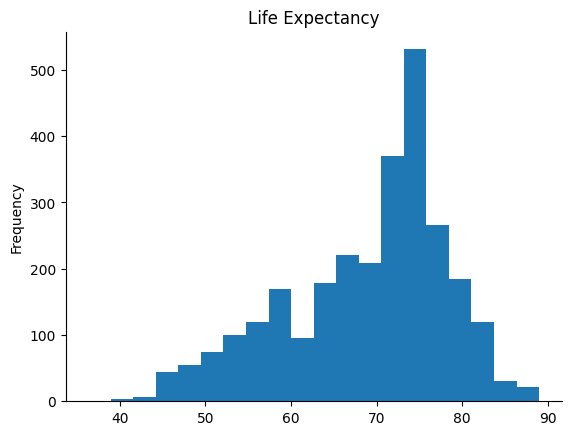

In [37]:
#life Expectancy

from matplotlib import pyplot as plt
df['Life Expectancy'].plot(kind='hist', bins=20, title='Life Expectancy')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [38]:
df.describe().T

count         mean          std       min  \
Status                           2797.0     0.842689     0.364159   0.00000   
Life Expectancy                  2797.0    68.957633     9.375041  36.30000   
Adult Mortality                  2797.0   166.580265   124.635912   1.00000   
infant deaths                    2797.0    31.292099   120.685314   0.00000   
BMI                              2797.0    37.702181    19.893256   1.00000   
under-five deaths                2797.0    43.341795   164.176635   0.00000   
Polio                            2797.0    82.298892    23.552381   3.00000   
Diphtheria                       2797.0    82.060779    23.872947   2.00000   
HIV/AIDS                         2797.0     1.803468     5.190343   0.10000   
GDP                              2797.0  4906.281476  8543.491760   1.68135   
Thinness(1-19 years)             2797.0     4.962710     4.441538   0.10000   
Thinness(5-9 years)              2797.0     4.997676     4.530323   0.10000   
Income composition of resources  2797.0     0.624076     0.197885   0.00000   
Schooling                        2797.0    11.985059     3.047480   0.00000   

                                       25%          50%         75%        max  
Status                             1.00000     1.000000     1.00000      1.000  
Life Expectancy                   63.00000    71.900000    75.30000     89.000  
Adult Mortality                   76.00000   146.000000   228.00000    723.000  
infant deaths                      0.00000     3.000000    22.00000   1800.000  
BMI                               19.10000    42.200000    55.70000     77.600  
under-five deaths                  0.00000     4.000000    28.00000   2500.000  
Polio                             77.00000    93.000000    97.00000     99.000  
Diphtheria                        78.00000    93.000000    97.00000     99.000  
HIV/AIDS                           0.10000     0.100000     0.80000     50.600  
GDP                              554.48766  1812.288374  4438.23741  46657.629  
Thinness(1-19 years)               1.70000     3.500000     7.30000     27.700  
Thinness(5-9 years)                1.70000     3.400000     7.30000     28.600  
Income composition of resources    0.50500     0.657000     0.76100      0.948  
Schooling                         10.30000    12.116312    14.00000     20.700

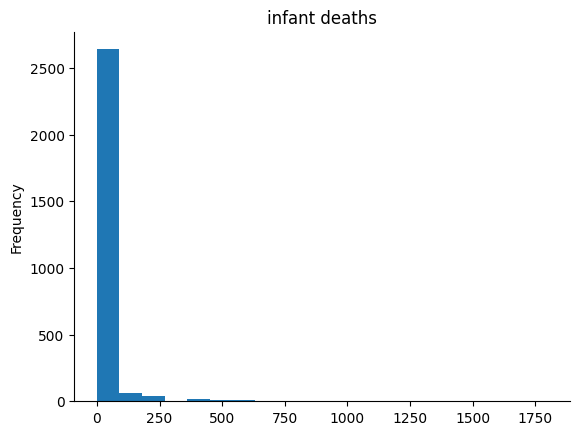

In [39]:
# @title infant deaths

from matplotlib import pyplot as plt
df['infant deaths'].plot(kind='hist', bins=20, title='infant deaths')
plt.gca().spines[['top', 'right',]].set_visible(False)

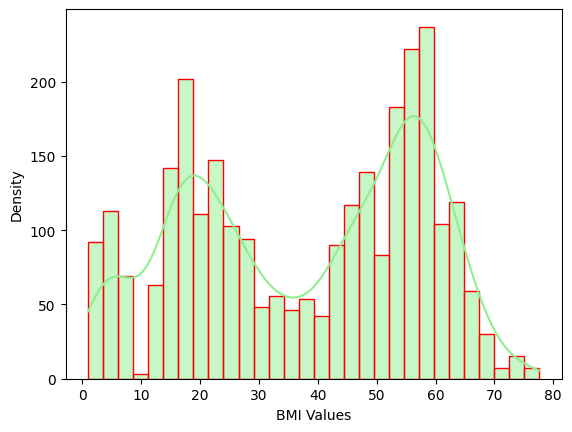

In [40]:
# @title BMI Column
sns.histplot(df['BMI'], bins=30, kde=True, color='lightgreen', edgecolor='red')
# Adding labels and title
plt.xlabel('BMI Values')
plt.ylabel('Density')
plt.show()

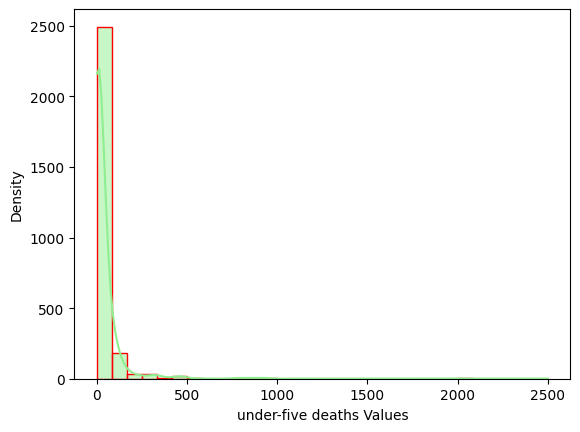

In [41]:
# @title under-five deaths
sns.histplot(df['under-five deaths'], bins=30, kde=True, color='lightgreen', edgecolor='red')
# Adding labels and title
plt.xlabel('under-five deaths Values')
plt.ylabel('Density')
plt.show()

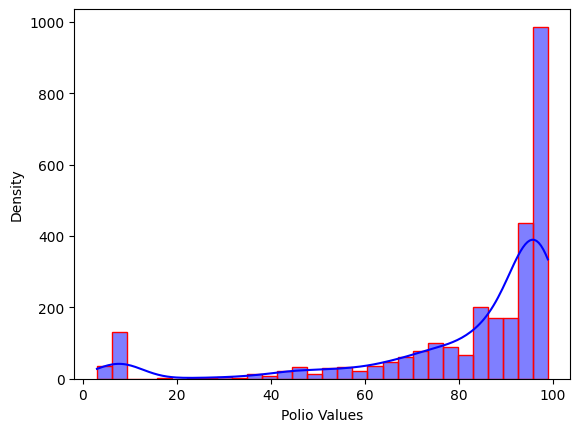

In [42]:
# @title Polio
sns.histplot(df['Polio'], bins=30, kde=True, color='blue', edgecolor='red')
# Adding labels and title
plt.xlabel('Polio Values')
plt.ylabel('Density')
plt.show()

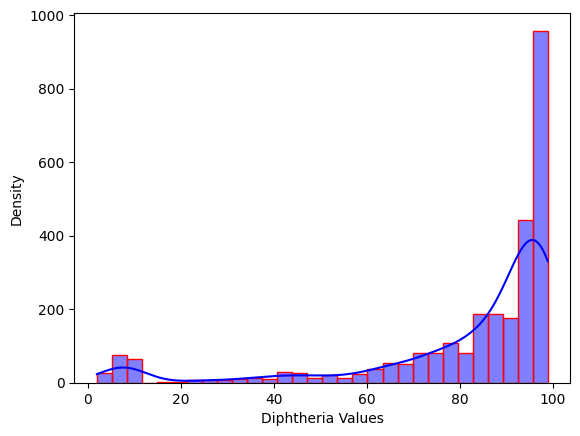

In [43]:
# @title Diphtheria
sns.histplot(df['Diphtheria'], bins=30, kde=True, color='blue', edgecolor='red')
# Adding labels and title
plt.xlabel('Diphtheria Values')
plt.ylabel('Density')
plt.show()

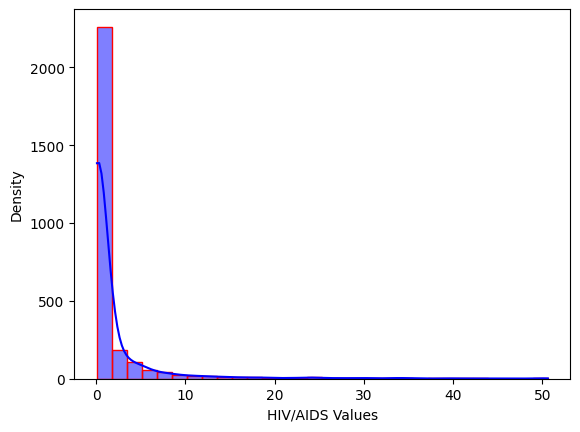

In [44]:
# @title HIV/AIDS
sns.histplot(df['HIV/AIDS'], bins=30, kde=True, color='blue', edgecolor='red')
# Adding labels and title
plt.xlabel('HIV/AIDS Values')
plt.ylabel('Density')
plt.show()

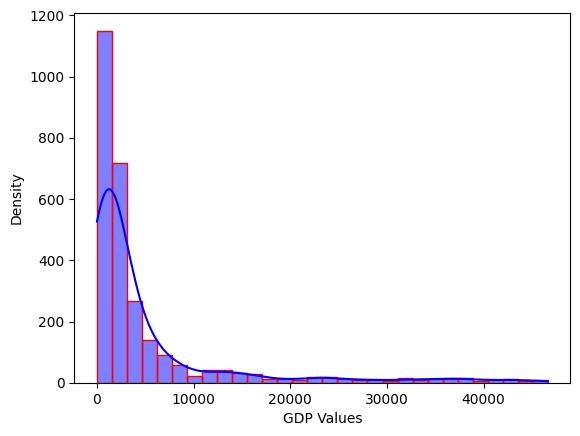

In [45]:
# @title GDP
sns.histplot(df['GDP'], bins=30, kde=True, color='blue', edgecolor='red')
# Adding labels and title
plt.xlabel('GDP Values')
plt.ylabel('Density')
plt.show()

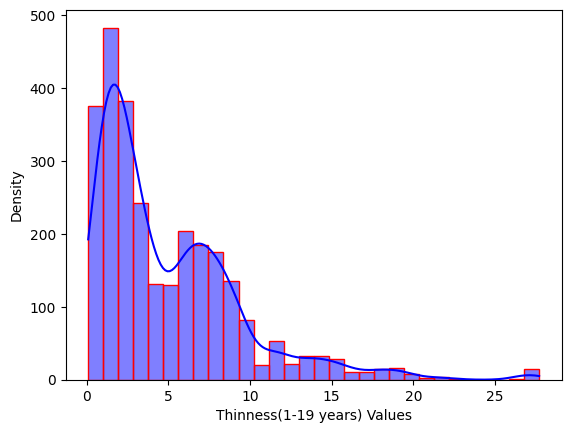

In [46]:
#Thinness(1-19 years)
# @title Thinness(1-19 years)
sns.histplot(df['Thinness(1-19 years)'], bins=30, kde=True, color='blue', edgecolor='red')
# Adding labels and title
plt.xlabel('Thinness(1-19 years) Values')
plt.ylabel('Density')
plt.show()

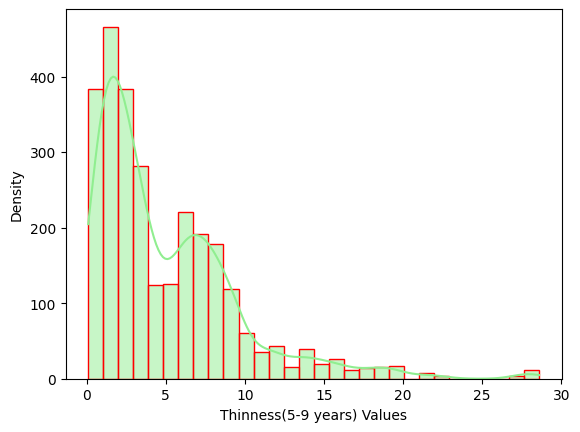

In [47]:
# @title Thinness(5-9 years)
sns.histplot(df['Thinness(5-9 years)'], bins=30, kde=True, color='lightgreen', edgecolor='red')
# Adding labels and title
plt.xlabel('Thinness(5-9 years) Values')
plt.ylabel('Density')
plt.show()

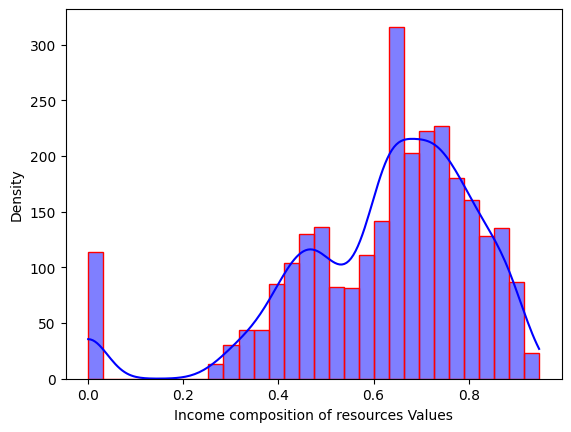

In [48]:
# @title Income composition of resources
sns.histplot(df['Income composition of resources'], bins=30, kde=True, color='blue', edgecolor='red')
# Adding labels and title
plt.xlabel('Income composition of resources Values')
plt.ylabel('Density')
plt.show()

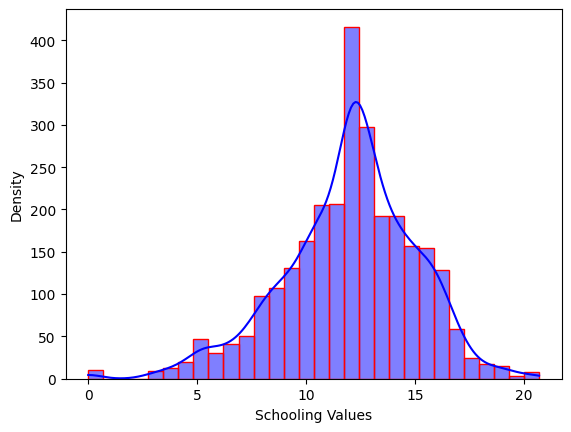

In [49]:
# @title Schooling
sns.histplot(df['Schooling'], bins=30, kde=True, color='blue', edgecolor='red')
# Adding labels and title
plt.xlabel('Schooling Values')
plt.ylabel('Density')
plt.show()

**Bivaraite and Multivariate Analysis**

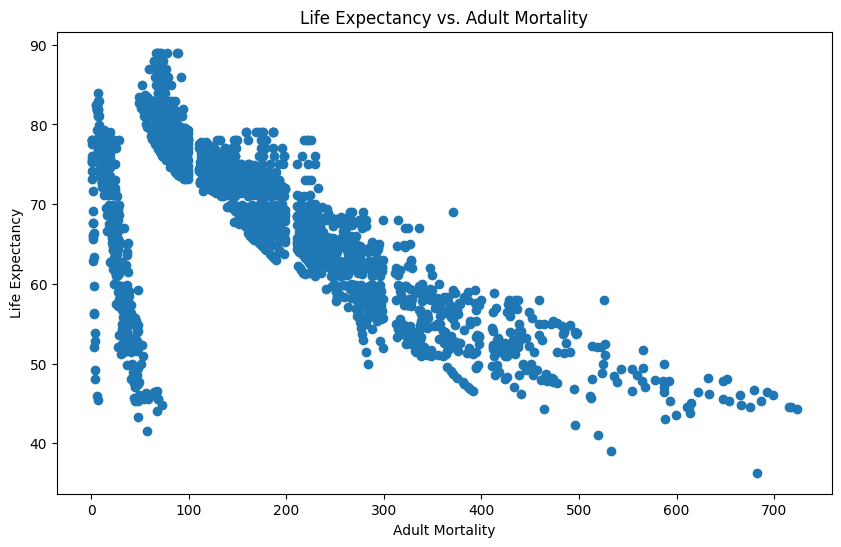

In [50]:
# @title Life Expectancy vs. Adult Mortality
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['Adult Mortality'], df['Life Expectancy'])
plt.xlabel('Adult Mortality')
plt.ylabel('Life Expectancy')
_ = plt.title('Life Expectancy vs. Adult Mortality')

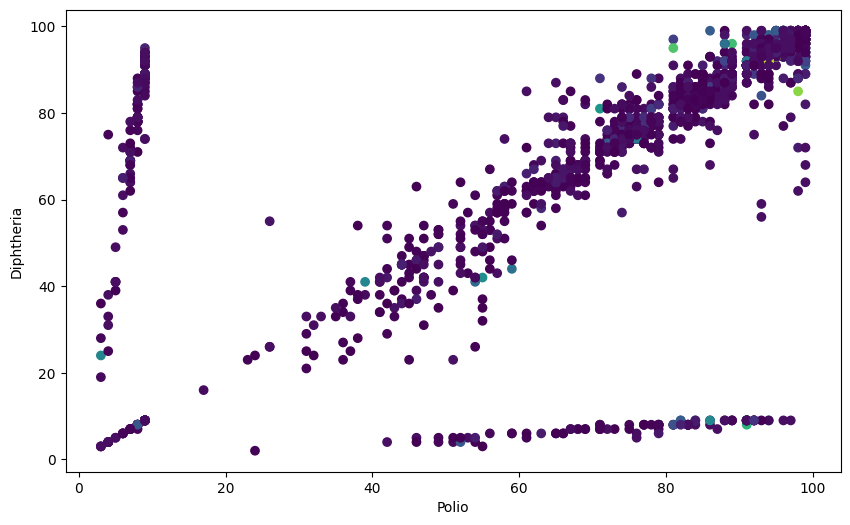

In [51]:
# @title Polio vs Diphtheria Vaccination Rates

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(df['Polio'], df['Diphtheria'], c=df['GDP'])
plt.xlabel('Polio')
_ = plt.ylabel('Diphtheria')

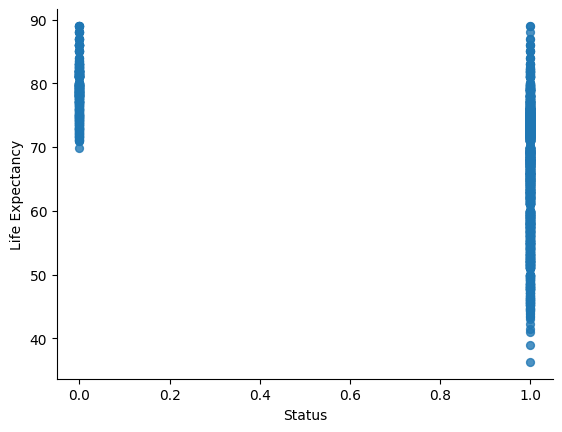

In [52]:
# @title Status vs Life Expectancy

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Status', y='Life Expectancy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

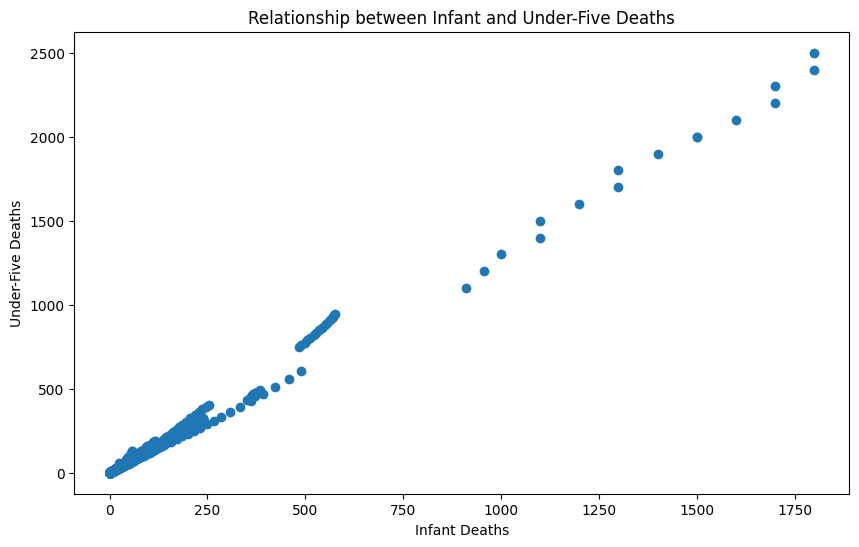

In [53]:
# @title Relationship between Infant and Under-Five Deaths

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['infant deaths'], df['under-five deaths'])
plt.xlabel('Infant Deaths')
plt.ylabel('Under-Five Deaths')
_ = plt.title('Relationship between Infant and Under-Five Deaths')

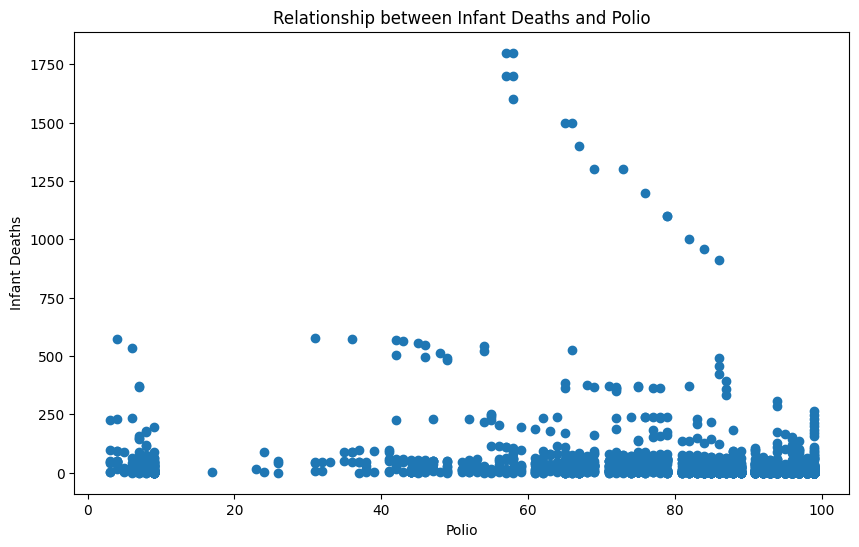

In [87]:
# @title Relationship between Infant and Polio

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['Polio'], df['infant deaths'])
plt.xlabel('Polio')
plt.ylabel('Infant Deaths')
_ = plt.title('Relationship between Infant Deaths and Polio')

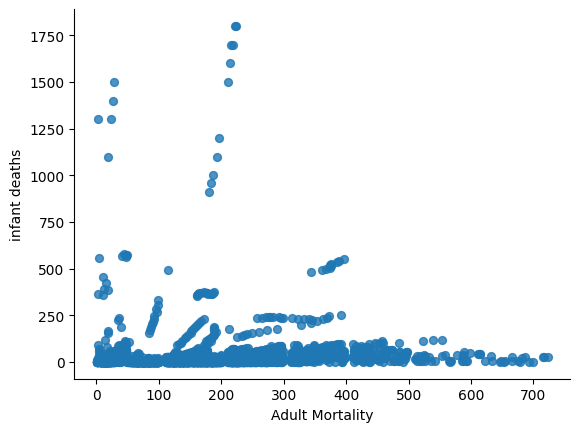

In [54]:
# @title Adult Mortality vs infant deaths

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Adult Mortality', y='infant deaths', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

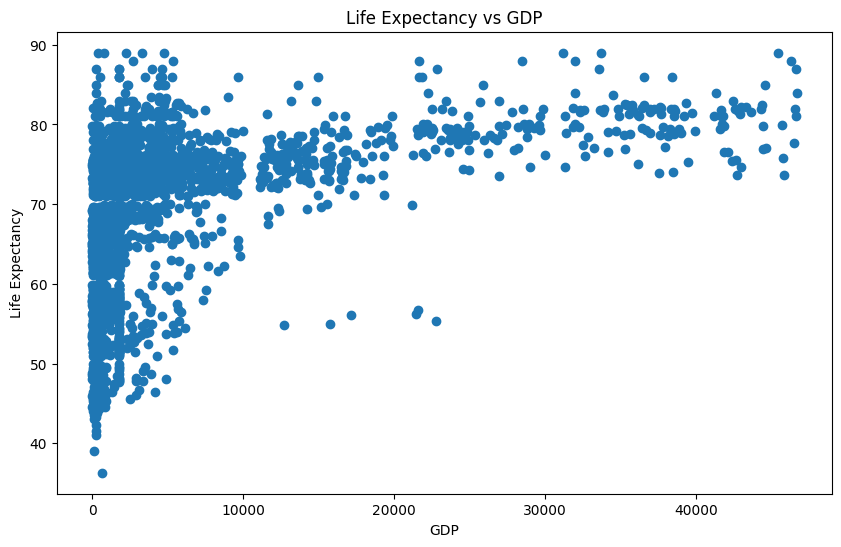

In [55]:
# @title Life Expectancy vs GDP

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['GDP'], df['Life Expectancy'])
plt.xlabel('GDP')
plt.ylabel('Life Expectancy')
_ = plt.title('Life Expectancy vs GDP')

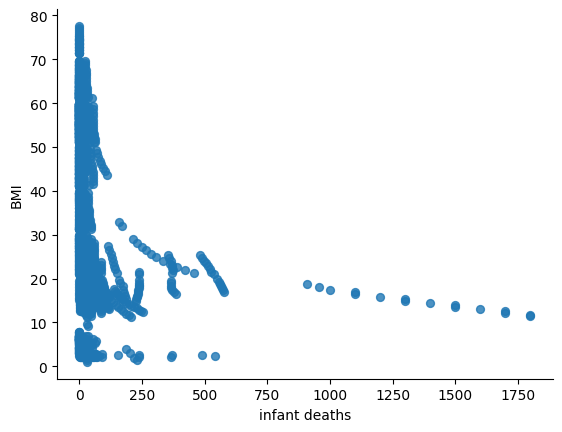

In [56]:
# @title infant deaths vs BMI

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='infant deaths', y='BMI', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

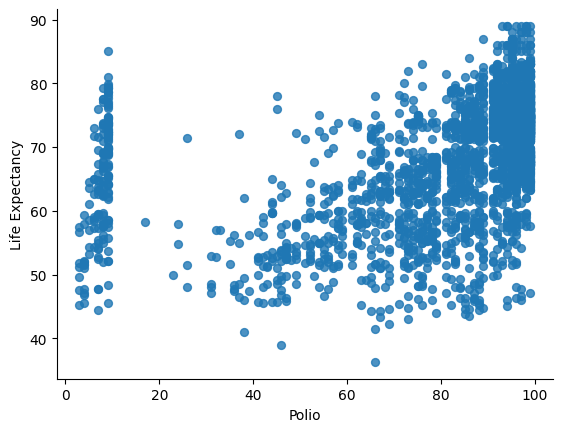

In [57]:
# @title Polio vs Life Expectancy

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Polio', y='Life Expectancy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

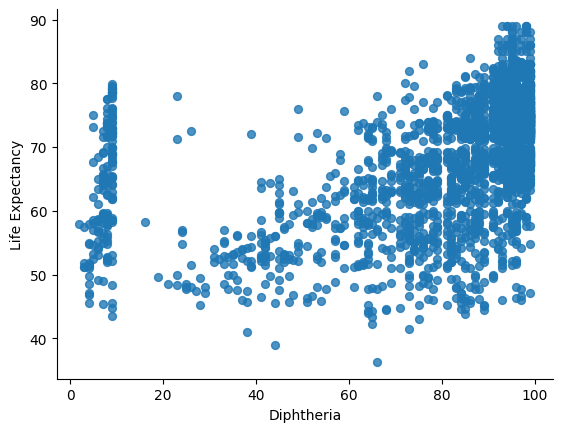

In [58]:
# @title Diptheria vs Life Expectancy

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Diphtheria', y='Life Expectancy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

functools.partial(<function SpinesProxy.__getattr__.<locals>.x at 0x7940991164d0>, [<matplotlib.spines.Spine object at 0x794099165840>, <matplotlib.spines.Spine object at 0x794099165a20>], 'set_visible')

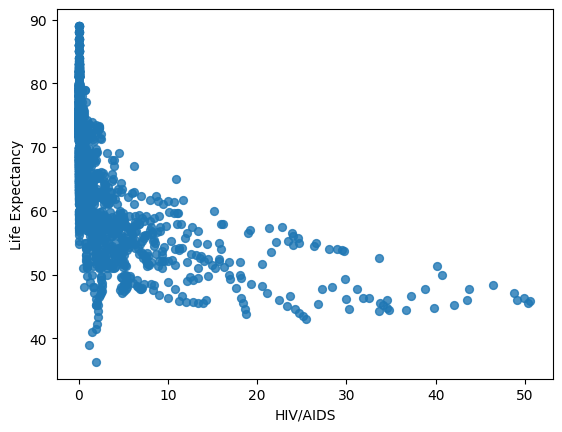

In [59]:
# @title HIV/AIDs vs Life Expectancy

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='HIV/AIDS', y='Life Expectancy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible

functools.partial(<function SpinesProxy.__getattr__.<locals>.x at 0x794098f97250>, [<matplotlib.spines.Spine object at 0x7940990ebc40>, <matplotlib.spines.Spine object at 0x7940990e9060>], 'set_visible')

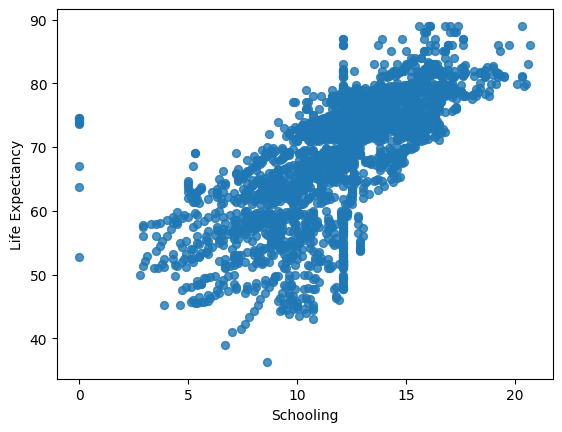

In [60]:
# @title Schooling vs Life Expectancy

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Schooling', y='Life Expectancy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible

functools.partial(<function SpinesProxy.__getattr__.<locals>.x at 0x794099011fc0>, [<matplotlib.spines.Spine object at 0x794098fe0d00>, <matplotlib.spines.Spine object at 0x794098fe0ee0>], 'set_visible')

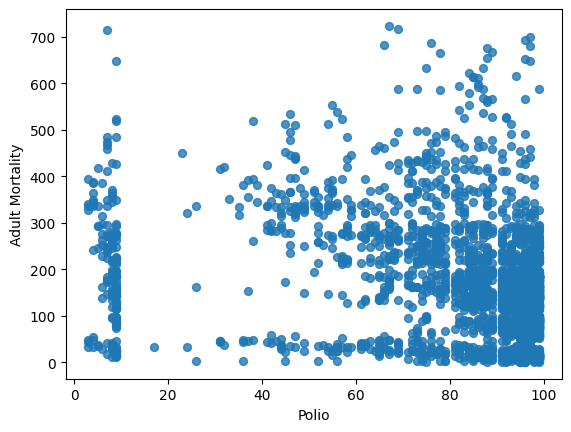

In [61]:
# @title Adult Mortality vs Polio

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Polio', y='Adult Mortality', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible

functools.partial(<function SpinesProxy.__getattr__.<locals>.x at 0x794098e99480>, [<matplotlib.spines.Spine object at 0x79409905cd30>, <matplotlib.spines.Spine object at 0x79409905cf10>], 'set_visible')

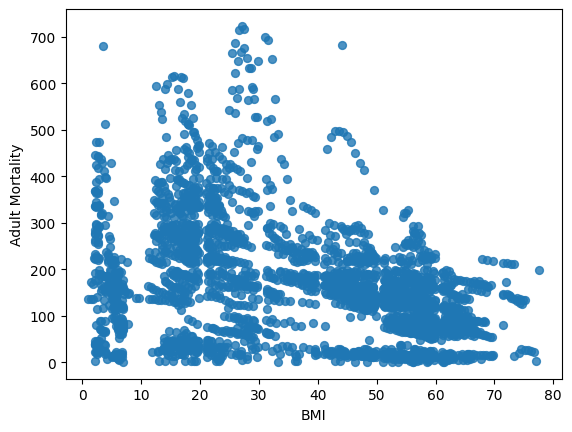

In [62]:
# @title Adult Mortality vs BMI

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='BMI', y='Adult Mortality', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible

functools.partial(<function SpinesProxy.__getattr__.<locals>.x at 0x794098f20550>, [<matplotlib.spines.Spine object at 0x794098ee1f90>, <matplotlib.spines.Spine object at 0x794098ee2170>], 'set_visible')

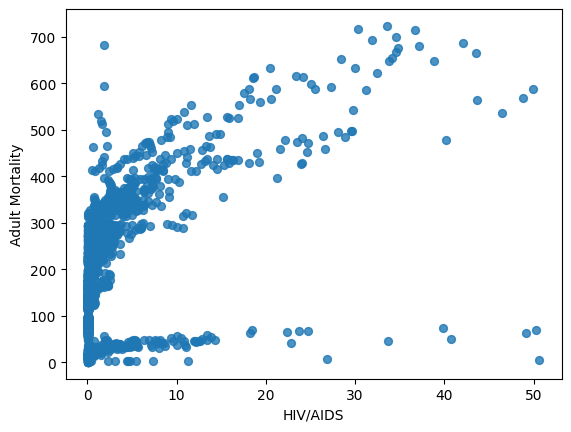

In [63]:
# @title Adult Mortality vs HIV/AIDS

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='HIV/AIDS', y='Adult Mortality', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible

functools.partial(<function SpinesProxy.__getattr__.<locals>.x at 0x794098d97760>, [<matplotlib.spines.Spine object at 0x794098f564a0>, <matplotlib.spines.Spine object at 0x794098f56680>], 'set_visible')

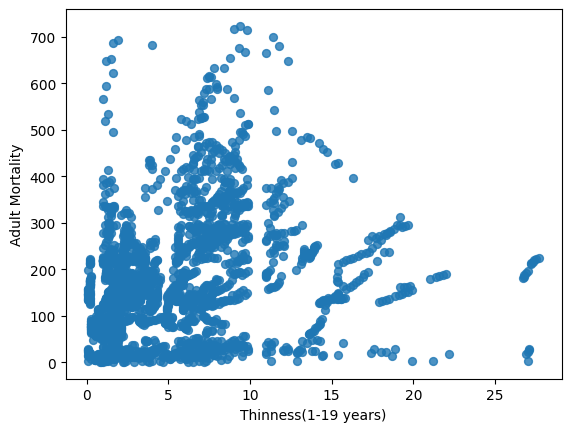

In [64]:
# @title Adult Mortality vs Thinness(1-19 years)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Thinness(1-19 years)', y='Adult Mortality', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible

functools.partial(<function SpinesProxy.__getattr__.<locals>.x at 0x794098e1acb0>, [<matplotlib.spines.Spine object at 0x794098de6380>, <matplotlib.spines.Spine object at 0x794098de6560>], 'set_visible')

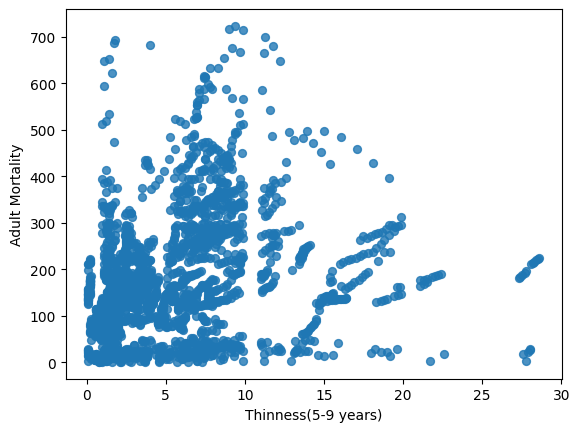

In [65]:
# @title Adult Mortality vs Thinness(5-9 years)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Thinness(5-9 years)', y='Adult Mortality', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible

functools.partial(<function SpinesProxy.__getattr__.<locals>.x at 0x7940990b41f0>, [<matplotlib.spines.Spine object at 0x794098e66ec0>, <matplotlib.spines.Spine object at 0x794098e670a0>], 'set_visible')

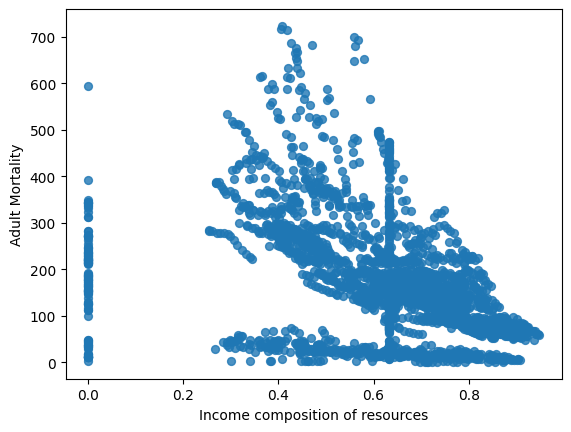

In [66]:
# @title Adult Mortality vs Income composition of resources

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Income composition of resources', y='Adult Mortality', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible

functools.partial(<function SpinesProxy.__getattr__.<locals>.x at 0x7940d7155a20>, [<matplotlib.spines.Spine object at 0x794099097f70>, <matplotlib.spines.Spine object at 0x794099096950>], 'set_visible')

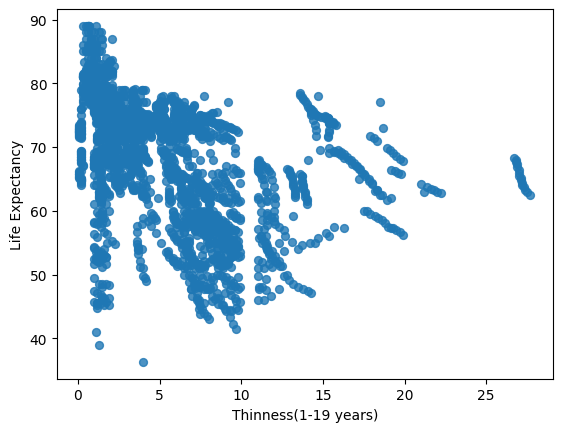

In [67]:
# @title Thinness(1-19 years)  vs Life Expectancy
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Thinness(1-19 years)', y='Life Expectancy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible

In [68]:
# @title MULTIVARIATE ANALYSIS

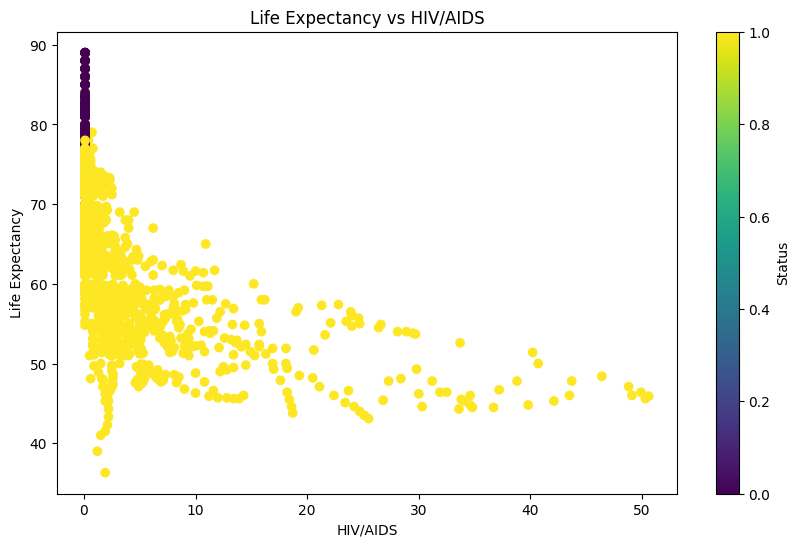

In [81]:
# @title Life Expectancy vs HIV/AIDS with Status

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['HIV/AIDS'], df['Life Expectancy'], c=df['Status'], cmap='viridis')
plt.xlabel('HIV/AIDS')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy vs HIV/AIDS')
_ = plt.colorbar(label='Status')

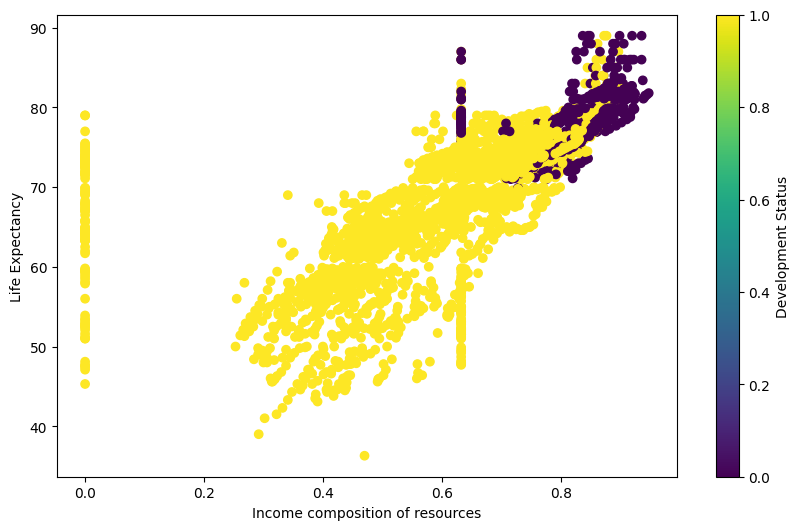

In [69]:
# @title Income Composition of Resources vs. Life Expectancy by Development Status

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(df['Income composition of resources'], df['Life Expectancy'], c=df['Status'], cmap='viridis')
plt.xlabel('Income composition of resources')
plt.ylabel('Life Expectancy')
_ = plt.colorbar(label='Development Status')

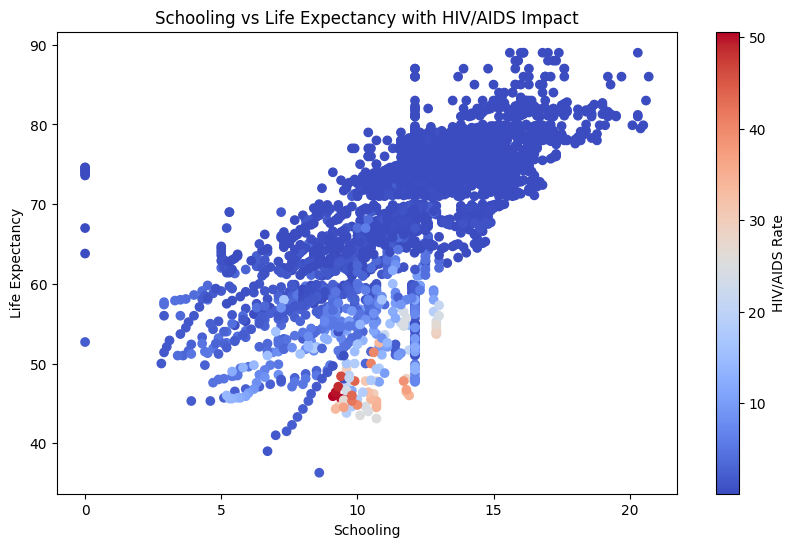

In [70]:
# @title Schooling vs Life Expectancy with HIV/AIDS Impact

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['Schooling'], df['Life Expectancy'], c=df['HIV/AIDS'], cmap='coolwarm')
plt.xlabel('Schooling')
plt.ylabel('Life Expectancy')
plt.title('Schooling vs Life Expectancy with HIV/AIDS Impact')
_ = plt.colorbar(label='HIV/AIDS Rate')

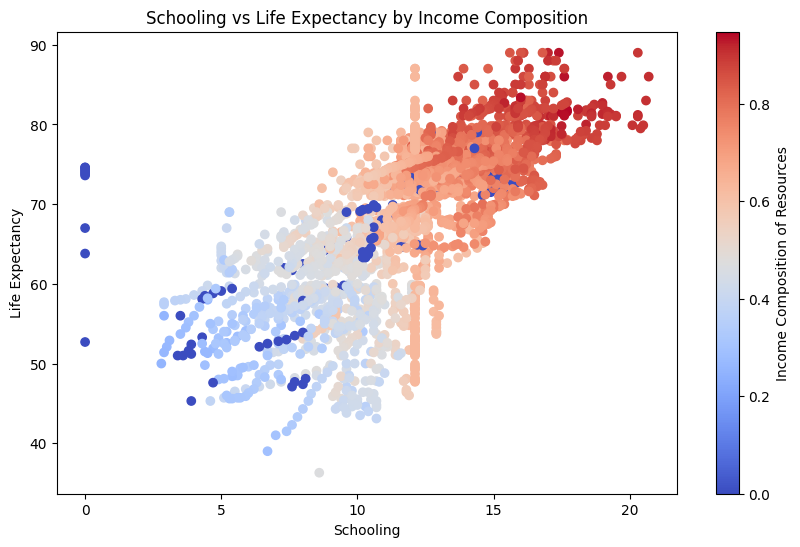

In [71]:
# @title Schooling vs Life Expectancy by Income Composition
plt.figure(figsize=(10, 6))
plt.scatter(df['Schooling'], df['Life Expectancy'], c=df['Income composition of resources'], cmap='coolwarm')
plt.xlabel('Schooling')
plt.ylabel('Life Expectancy')
plt.title('Schooling vs Life Expectancy by Income Composition')
_ = plt.colorbar(label='Income Composition of Resources')

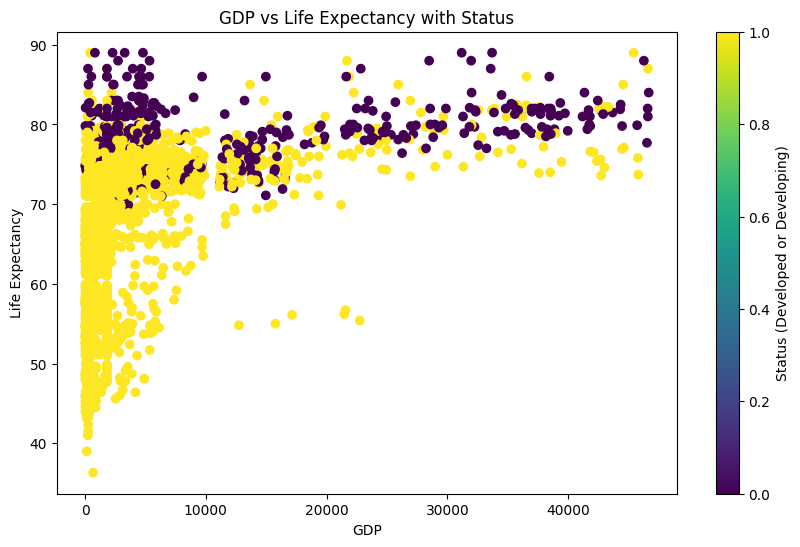

In [72]:
# @title GDP vs Life Expectancy with Status of a Country

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['GDP'], df['Life Expectancy'], c=df['Status'], cmap='viridis')
plt.xlabel('GDP')
plt.ylabel('Life Expectancy')
plt.title('GDP vs Life Expectancy with Status')
_ = plt.colorbar(label='Status (Developed or Developing)')

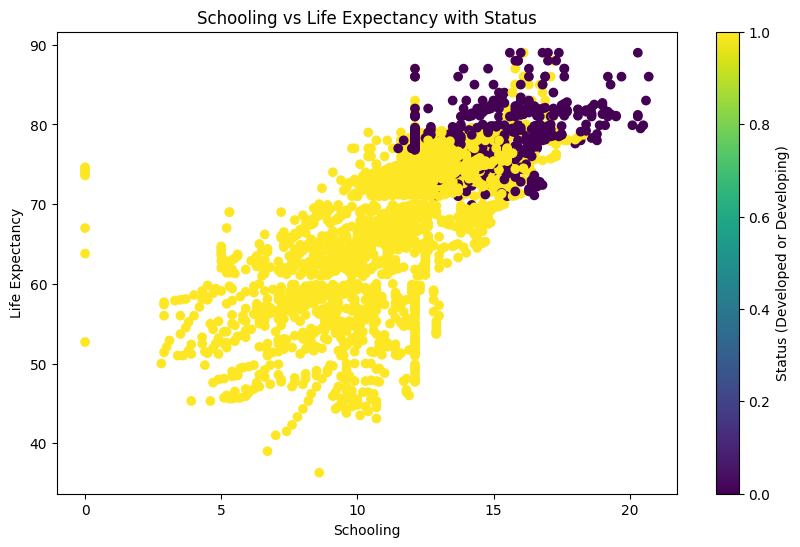

In [73]:
# @title Schooling vs Life Expectancy with Status of a Country

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['Schooling'], df['Life Expectancy'], c=df['Status'], cmap='viridis')
plt.xlabel('Schooling')
plt.ylabel('Life Expectancy')
plt.title('Schooling vs Life Expectancy with Status')
_ = plt.colorbar(label='Status (Developed or Developing)')

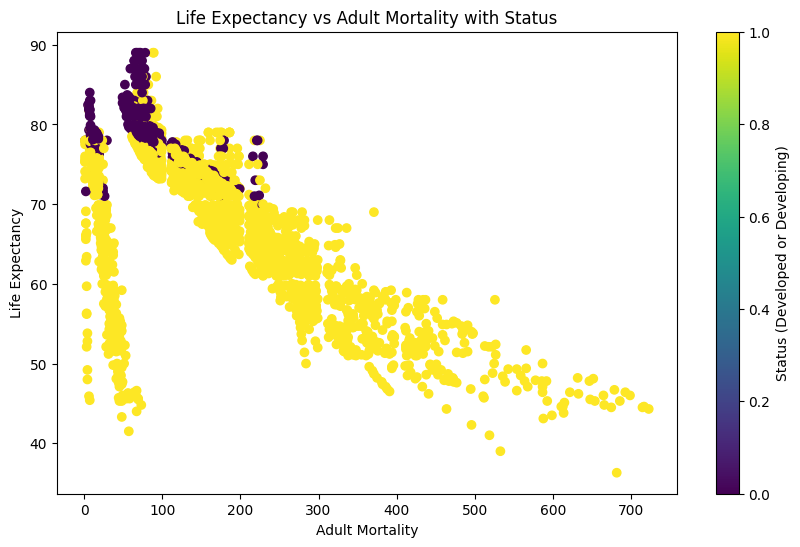

In [83]:
# @title Life Expectancy vs Adult Mortality with Status of a Country

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['Adult Mortality'], df['Life Expectancy'], c=df['Status'], cmap='viridis')
plt.xlabel('Adult Mortality')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy vs Adult Mortality with Status')
_ = plt.colorbar(label='Status (Developed or Developing)')

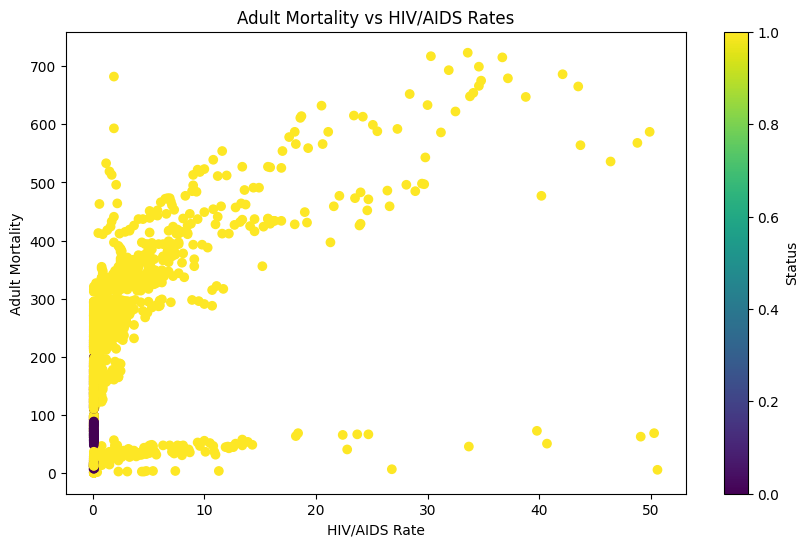

In [74]:
# @title Adult Mortality vs HIV/AIDS Rates with Status

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['HIV/AIDS'], df['Adult Mortality'], c=df['Status'], cmap='viridis')
plt.xlabel('HIV/AIDS Rate')
plt.ylabel('Adult Mortality')
plt.title('Adult Mortality vs HIV/AIDS Rates')
_ = plt.colorbar(label='Status')

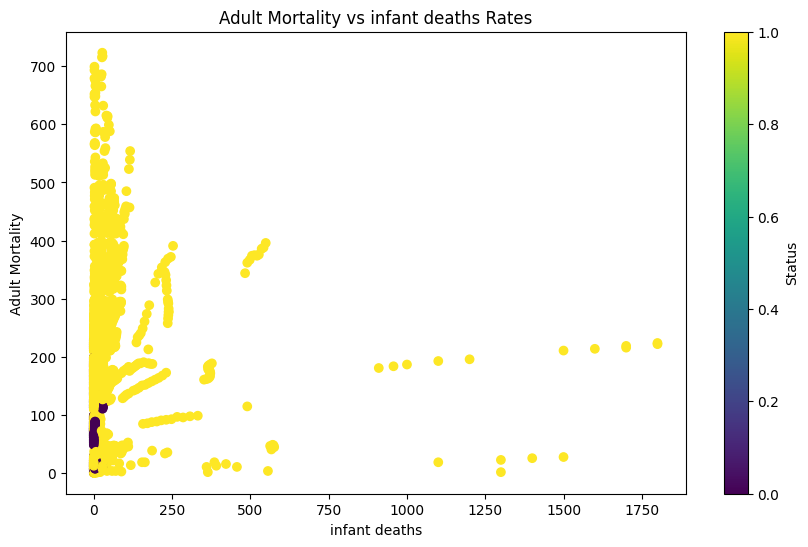

In [75]:
# @title Adult Mortality vs infant deaths Rates with Status

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['infant deaths'], df['Adult Mortality'], c=df['Status'], cmap='viridis')
plt.xlabel('infant deaths')
plt.ylabel('Adult Mortality')
plt.title('Adult Mortality vs infant deaths Rates')
_ = plt.colorbar(label='Status')

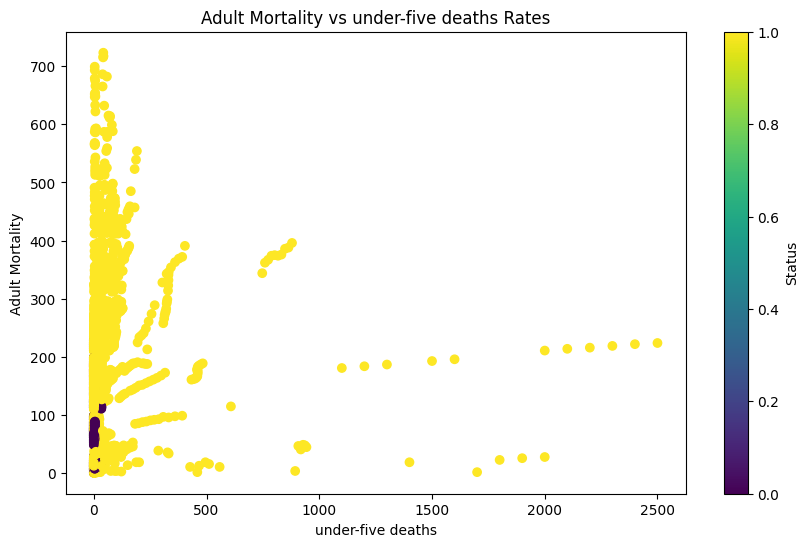

In [76]:
# @title Adult Mortality vs under-five deaths Rates with Status

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['under-five deaths'], df['Adult Mortality'], c=df['Status'], cmap='viridis')
plt.xlabel('under-five deaths')
plt.ylabel('Adult Mortality')
plt.title('Adult Mortality vs under-five deaths Rates')
_ = plt.colorbar(label='Status')

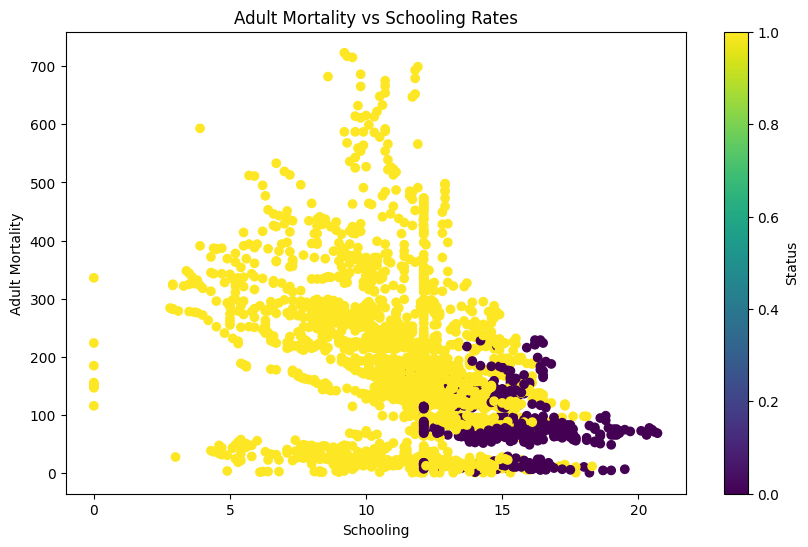

In [77]:
# @title Adult Mortality vs Schooling Rates with Status

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['Schooling'], df['Adult Mortality'], c=df['Status'], cmap='viridis')
plt.xlabel('Schooling')
plt.ylabel('Adult Mortality')
plt.title('Adult Mortality vs Schooling Rates')
_ = plt.colorbar(label='Status')

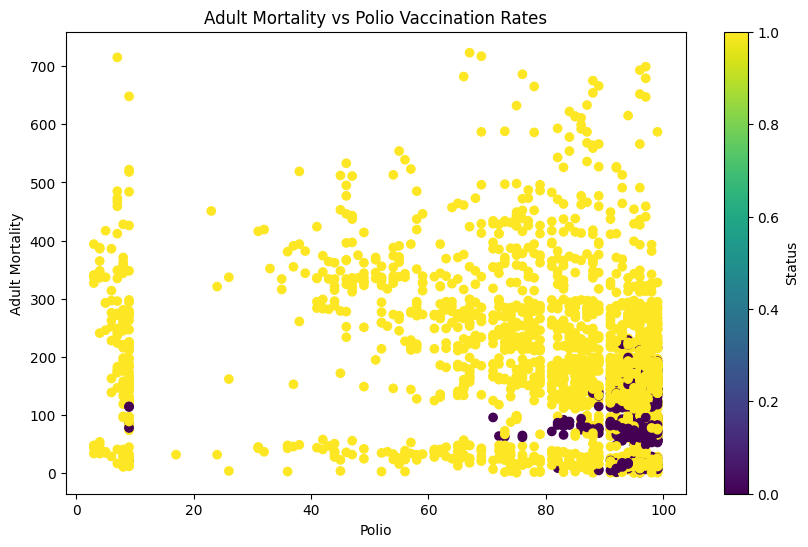

In [78]:
# @title Adult Mortality vs Polio with Status

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['Polio'], df['Adult Mortality'], c=df['Status'], cmap='viridis')
plt.xlabel('Polio')
plt.ylabel('Adult Mortality')
plt.title('Adult Mortality vs Polio Vaccination Rates')
_ = plt.colorbar(label='Status')

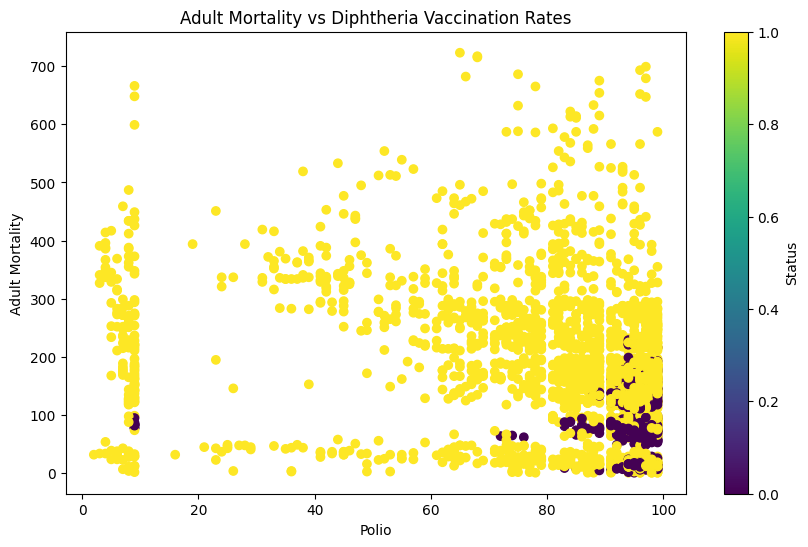

In [79]:
# @title Adult Mortality vs Diphtheria with Status

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['Diphtheria'], df['Adult Mortality'], c=df['Status'], cmap='viridis')
plt.xlabel('Polio')
plt.ylabel('Adult Mortality')
plt.title('Adult Mortality vs Diphtheria Vaccination Rates')
_ = plt.colorbar(label='Status')

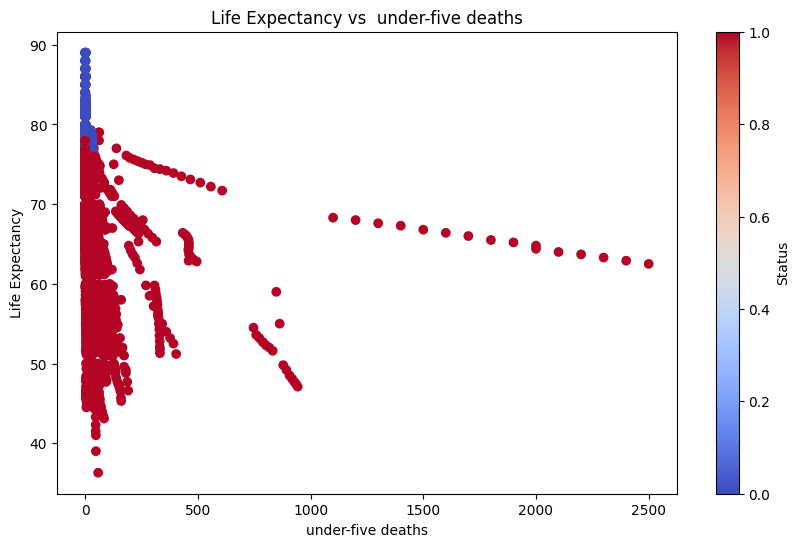

In [85]:
# @title life expectancy vs under-five deaths with status
plt.figure(figsize=(10, 6))
plt.scatter(df['under-five deaths'], df['Life Expectancy'], c=df['Status'], cmap='coolwarm')
plt.xlabel('under-five deaths')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy vs  under-five deaths')
_ = plt.colorbar(label='Status')

<Axes: >

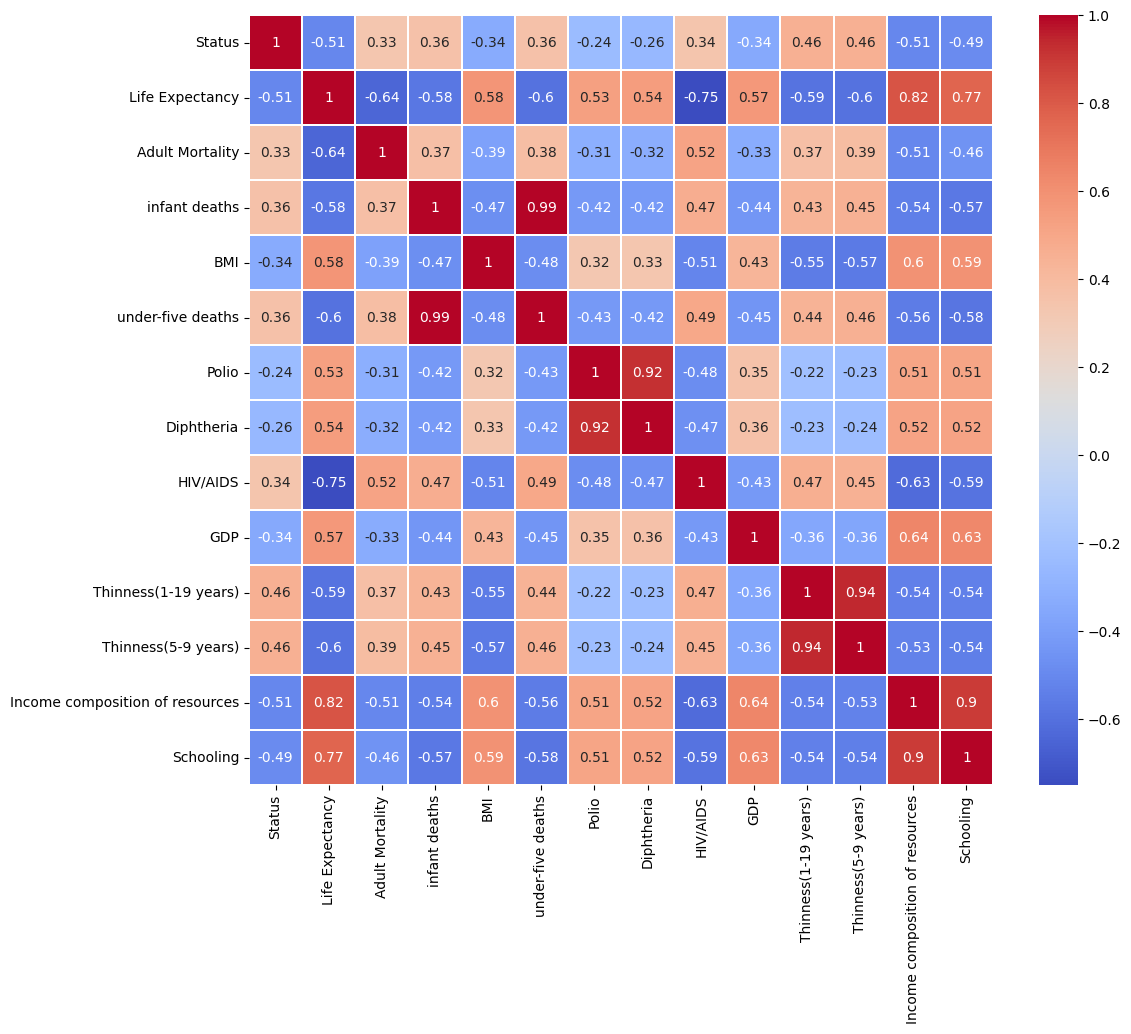

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
corrmat = df.corr(method = "spearman")
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corrmat, ax=ax, cmap = "coolwarm", linewidth = 0.1, annot = True)